In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# extracting dataset and initial plot

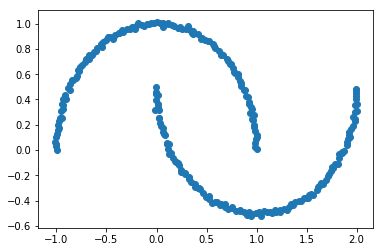

In [2]:
x,y = make_moons(250,random_state=19,noise=0.01)
plt.scatter(x[:,0],x[:,1])


# defining k ,sigma and affinity matrix

In [3]:
k = 2
sigma = 0.2

In [6]:
def affinity_matrix(am):
    A=np.zeros([len(am),len(am)],dtype=float)
    for i in range(len(am)):
        for j in range(len(am)):
            if i!=j:
                A[i][j]=np.exp(-sum((am[i]-am[j])**2)/(2*sigma**2))
            else:
                A[i][j]=0
    return(A)
A_M=affinity_matrix(x)
                
 

# diagonal matrix and finding the L matrix

In [60]:
def l_matrix(d):
    D_inv=np.zeros([len(d),len(d)],dtype=float)
    for i in range(len(d)):
        D_inv[i][i]=sum(d[i])**(-0.5)
    L=np.dot(D_inv,d).dot(D_inv)
    return(L)
L_M=l_matrix(A_M)     
L_M

array([[0.00000000e+00, 2.15266985e-17, 4.40607786e-09, ...,
        7.37214289e-22, 2.27722953e-08, 5.40821683e-08],
       [2.15266985e-17, 0.00000000e+00, 2.92005419e-05, ...,
        1.36449798e-03, 2.85678017e-43, 1.86002080e-39],
       [4.40607786e-09, 2.92005419e-05, 0.00000000e+00, ...,
        1.61783996e-10, 1.50678600e-28, 6.73417263e-28],
       ...,
       [7.37214289e-22, 1.36449798e-03, 1.61783996e-10, ...,
        0.00000000e+00, 1.85421811e-48, 4.27036058e-42],
       [2.27722953e-08, 2.85678017e-43, 1.50678600e-28, ...,
        1.85421811e-48, 0.00000000e+00, 5.45806953e-03],
       [5.40821683e-08, 1.86002080e-39, 6.73417263e-28, ...,
        4.27036058e-42, 5.45806953e-03, 0.00000000e+00]])

# finding the eigen value and eigen vector and creating the new matrix for k

In [61]:
eig_val,eig_vec=np.linalg.eig(L_M)
X=eig_vec[:,:k]
X

array([[-0.0648533 ,  0.04502482],
       [-0.06471428,  0.07995737],
       [-0.06491495,  0.06484475],
       [-0.06480941, -0.04616004],
       [-0.05812156,  0.03435329],
       [-0.06506919,  0.07208271],
       [-0.06445954,  0.07737548],
       [-0.06490641, -0.07865543],
       [-0.06525437,  0.0532745 ],
       [-0.06492762, -0.0619308 ],
       [-0.05853195, -0.07522942],
       [-0.06523539,  0.04798999],
       [-0.06495623,  0.07059802],
       [-0.06503716,  0.05710371],
       [-0.06443226,  0.08171481],
       [-0.06499068,  0.07360418],
       [-0.06533972,  0.05794646],
       [-0.05051752, -0.02318553],
       [-0.06502112,  0.05791117],
       [-0.06492608,  0.06759807],
       [-0.06569793,  0.05134845],
       [-0.06451747,  0.08131222],
       [-0.06136717,  0.07918166],
       [-0.06514765, -0.07764984],
       [-0.06569636,  0.04976203],
       [-0.06129206,  0.03811943],
       [-0.06328648, -0.04155641],
       [-0.06554186,  0.05126009],
       [-0.06501812,

# final transformed dataset

In [9]:
Y_matrix=np.zeros(X.shape)
for i in range(len(Y_matrix)):
    Y_matrix[i] = X[i]/(sum(X[i]**2)**0.5)
Y_matrix

array([[-0.82144232,  0.57029161],
       [-0.62912121,  0.77730721],
       [-0.70748925,  0.70672411],
       [-0.81451969, -0.58013592],
       [-0.86086985,  0.50882522],
       [-0.67007199,  0.74229612],
       [-0.64006701,  0.76831909],
       [-0.63647442, -0.77129781],
       [-0.77462849,  0.63241656],
       [-0.72360913, -0.69020999],
       [-0.6140725 , -0.78924962],
       [-0.80551667,  0.59257312],
       [-0.67709069,  0.73589958],
       [-0.7514522 ,  0.65978754],
       [-0.61917397,  0.78525384],
       [-0.66188391,  0.74960635],
       [-0.74816668,  0.66351083],
       [-0.90884893, -0.41712542],
       [-0.74675529,  0.66509889],
       [-0.69270908,  0.72121711],
       [-0.78789667,  0.61580747],
       [-0.62156306,  0.78336413],
       [-0.61258027,  0.79040838],
       [-0.64273951, -0.7660848 ],
       [-0.79713855,  0.60379643],
       [-0.84916748,  0.52812364],
       [-0.83589849, -0.54888407],
       [-0.78770058,  0.61605828],
       [-0.7100773 ,

# cluster formed from transformed dataset

In [10]:
cluster_Y = KMeans(n_clusters = k).fit_predict(Y_matrix)
cluster_Y

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0])

# cluster formed from original dataset

In [11]:
cluster_x = KMeans(n_clusters = k).fit_predict(x)
cluster_x

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1])

# comparing the clusters formed from org. dataset and transformed dataset on original dataset

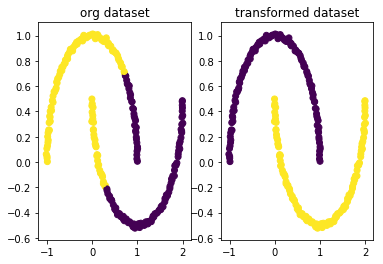

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.scatter(x[:,0],x[:,1],c=cluster_x)
ax2.scatter(x[:,0],x[:,1],c=cluster_Y)
ax1.set(title='org dataset')
ax2.set(title='transformed dataset')

plt.show()

